In [34]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

sns.set_style("darkgrid")

def rm_outliers(df):
    return df[np.abs(df - df.mean()) <= 3*df.std()]

def plot_stuff(f, name):
    data = pd.read_csv(f)
    eg = rm_outliers(data['eg'])
    ch = rm_outliers(data['ch'])
    
    describe = {'eg': eg.describe(), 'ch': ch.describe()}
    print name
    print '---'
    print describe['eg']
    print '---'
    print describe['ch']
    
    sns.distplot(eg, hist=False, kde_kws={'label': 'eg'})
    sns.distplot(ch, hist=False, kde_kws={'label': 'ch'})
    
    lower = min([describe[x]['mean'] - 3*describe[x]['std'] for x in ('eg', 'ch')])
    upper = max([describe[x]['mean'] + 3*describe[x]['std'] for x in ('eg', 'ch')])
    plt.xlabel('microsegundos')
    plt.xlim(lower, upper)
    plt.show()

## Cholesky vs EG
En un sistema con 1000 partidos, el método mas eficaz depende de la cantidad de equipos que juegan.

20 equipos
---
count    996.000000
mean      14.428715
std        4.433080
min        6.000000
25%       13.000000
50%       13.000000
75%       14.000000
max       37.000000
Name: eg, dtype: float64
---
count    982.000000
mean      18.977597
std        4.102348
min       12.000000
25%       17.000000
50%       18.000000
75%       18.000000
max       36.000000
Name: ch, dtype: float64


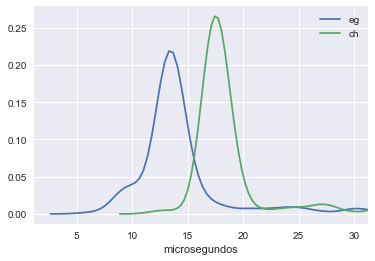

200 equipos
---
count      99.000000
mean     3325.141414
std       790.177596
min      1884.000000
25%      3296.000000
50%      3384.000000
75%      3501.500000
max      9036.000000
Name: eg, dtype: float64
---
count      98.000000
mean     2907.122449
std       207.760532
min      2701.000000
25%      2754.000000
50%      2814.500000
75%      3038.500000
max      3477.000000
Name: ch, dtype: float64


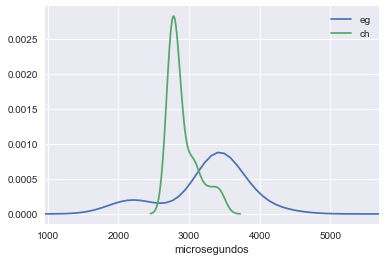

500 equipos
---
count      998.000000
mean     45705.088176
std       2509.573913
min      27846.000000
25%      45046.250000
50%      45590.000000
75%      46430.500000
max      60976.000000
Name: eg, dtype: float64
---
count      988.000000
mean     24941.814777
std        708.561028
min      23845.000000
25%      24432.000000
50%      24758.000000
75%      25259.500000
max      27845.000000
Name: ch, dtype: float64


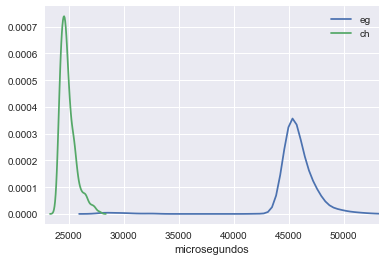

In [71]:
plot_stuff('csv/20_1000.csv', '20 equipos')
plot_stuff('csv/200_1000.csv', '200 equipos')
plot_stuff('csv/500_1000.csv', '500 equipos')

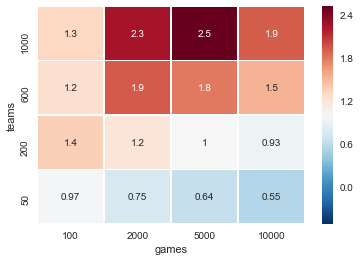

In [77]:
d={'games':[],'teams':[], 'ratio':[]}
for t in [50,200,600,1000]:
    for g in [100,2000,5000,10000]:
        data = pd.read_csv('csv/{}_{}.csv'.format(t,g))
        eg = rm_outliers(data['eg'])
        ch = rm_outliers(data['ch'])
        d['games'].append(g)
        d['teams'].append(t)
        d['ratio'].append(eg.mean()/ch.mean())

df = pd.DataFrame(d)
df = df.pivot('teams', 'games', 'ratio')[::-1]
sns.heatmap(df, annot=True, linewidths=.5, center=1)
plt.show()